# CS145 Howework 3, Part 2: Neural Networks

<span style="color:red"> **Important Note:** </span>
HW3 is due on **11:59 PM PT, Nov 9 (Monday, Week 6)**. Please submit through GradeScope. 

Note that, Howework #3 has two jupyter notebooks to complete (Part 1: kNN and Part 2: Neural Network).  

----

## Print Out Your Name and UID

<span style="color:blue"> **Name: Wenxuan Liu, UID: 805152602** </span>

----

## Before You Start

You need to first create HW3 conda environment by the given `cs145hw3.yml` file, which provides the name and necessary packages for this tasks. If you have `conda` properly installed, you may create, activate or deactivate by the following commands:

```
conda env create -f cs145hw3.yml
conda activate hw3
conda deactivate
```
OR 

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw3.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

More useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks (such as hyperparameters) that you are allowed to edit (between `STRART/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations. 

## Section 1: Backprop in a neural network 

<span style="color:red"> Note: Section 1 is "question-answer" style problem. You do not need to code anything and you are required to calculate by hand (with a scientific calculator), which helps you understand the back propagation in neural networks. </span>

In this question, let's consider a simple two-layer neural network and manually do the forward and backward pass. For simplicity, we assume our input data is two dimension. Then the model architecture looks like the following. Notice that in the example we saw in class, the bias term `b` was not explicit listed in the architecture diagram. Here we include the term `b` explicitly for each layer in the diagram. Recall the formula for computing $\mathbf{x^{(l)}}$ in the $l$-th layer from $\mathbf{x^{(l-1)}}$ in the $(l-1)$-th layer is $\mathbf{x^{(l)}} = \mathbf{f^{(l)}(W^{(l)} x^{(l-1)} + b^{(l)})}$. The activation function $\mathbf{f^{(l)}}$ we choose is the `sigmoid` function for all layers, i.e. $\mathbf{f^{(l)}}(z) = \frac{1}{1+\exp(-z)}$. The final loss function is $\frac{1}{2}$ of the `mean squared error` loss, i.e. $l\mathbf{(y, \hat y)} = \frac{1}{2} ||\mathbf{y - \hat y}||^2$. <img src="nn.png"  width="350"/>

We initialize our weights as $$\mathbf{W^{(1)}} = \begin{bmatrix}
0.15 & 0.2 \\
0.25 & 0.3 
\end{bmatrix}, \quad \mathbf{W^{(2)}} = [0.4, 0.45], \quad \mathbf{b^{(1)}} = [0.35, 0.35], \quad \mathbf{b^{(2)}} = 0.6$$

### Forward pass

**Questions**

1. When the input $\mathbf{x^{(0)}} = [0.05, 0.1]$, what will be the value of $\mathbf{x^{(1)}}$ in the hidden layer? (Show your work).
2. Based on the value $\mathbf{x^{(1)}}$ you computed, what will be the value of $\mathbf{x^{(2)}}$ in the output layer? (Show your work).
3. When the target value of this input is $y = 0.01$, based on the value $\mathbf{x^{(2)}}$ you computed, what will be the loss? (Show your work).

**Answers:**

<span style="color:blue"> Please write down your answer here! </span>
1. 


$ x^{(1)} = \mathbf{f^{(1)}(W^{(1)} x^{(0)} + b^{(1)})}$

$= f^{(1)}(\begin{bmatrix}
0.15 & 0.2 \\
0.25 & 0.3 
\end{bmatrix}*[0.05, 0.1]^T+[0.35, 0.35]) $

$= f^{(1)}([0.3775, 0.3925])$

$=[0.59326, 0.59688]$

2. 


$ x^{(2)} = \mathbf{f^{(2)}(W^{(2)} x^{(1)} + b^{(2)})} $

$= f^{(2)}([0.59326, 0.59688][0.4, 0.45]^T+0.6)$

$=f^{(2)}(1.1059) = 0.7514 $

3. 


$ loss = l\mathbf{(y, x^{(2)})} $

$= \frac{1}{2}||\mathbf{y - x^{(2)}}||^2 $

$= \frac12*||0.01-0.7514||^2=0.2748$

### Backward pass

With the loss computed below, we are ready for a backward pass to update the weights in the neural network. Kindly remind that the gradients of a variable should have the same shape with the variable.

**Questions**

1. Consider the loss $l$ of the same input $\mathbf{x^{(0)}} = [0.05, 0.1]$, what will be the update of $\mathbf{W^{(2)}}$ and $\mathbf{b^{(2)}}$ when we backprop, i.e. $\frac{\partial l}{\partial \mathbf{W^{(2)}}}$, $\frac{\partial l}{\partial \mathbf{b^{(2)}}}$  (Show your work in detailed calculation steps. Answers without justification will not be credited.).
2. Based on the result you computed in part 1, when we keep backproping, what will be the update of $\mathbf{W^{(1)}}$ and $\mathbf{b^{(1)}}$, i.e. $\frac{\partial l}{\partial \mathbf{W^{(1)}}}$, $\frac{\partial l}{\partial \mathbf{b^{(1)}}}$  (Show your work in details calculation steps. Answers without justification will not be credited.).

**Answers:**

<span style="color:blue"> Please write down your answer here! </span>

1.

$\frac{\partial l}{\partial \mathbf{W^{(2)}}} = \frac{\partial l}{\partial \mathbf{x^{(2)}}} \frac{\partial \mathbf{x^{(2)}}}{\partial z}\frac{\partial z}{\partial W^{(2)}}$

$ =-(y-x^{(2)})*f^{(2)'}(z)*x^{(1)} $

$ =-(y-x^{(2)})*(f(z)*(1-f(z))*(x^{(1)}) $

$ =-(0.01-0.7514)*(f(1.1059)*(1-f(1.1059))*([0.59326, 0.59688]) $

$ = 0.7414*(0.7514*0.2486)*[0.59326, 0.59688] $

$ = 0.1385*[0.59326, 0.59688] $

$ = [0.0822, 0.0827] $



$ \frac{\partial l}{\partial b^{(2)}} = \frac{\partial l}{\partial \mathbf{x^{(2)}}} \frac{\partial \mathbf{x^{(2)}}}{\partial z}\frac{\partial z}{\partial b^{(2)}}$

$ =-(y-x^{(2)})*f^{(2)'}(z)*1 $

$ =-(y-x^{(2)})*(f(z)*(1-f(z))*1 $

$ =-(0.01-0.7514)*(f(1.1059)*(1-f(1.1059)) $

$ = 0.7414*(0.7414*0.2486) $

$ = 0.1385 $


2. $\frac{\partial l}{\partial \mathbf{W^{(1)}}} = \frac{\partial l}{\partial \mathbf{x^{(2)}}} \frac{\partial \mathbf{x^{(2)}}}{\partial z}\frac{\partial z^{(2)}}{\partial x^{(1)}}\frac{\partial \mathbf{x^{(1)}}}{\partial z^{(1)}}\frac{\partial \mathbf{z^{(1)}}}{\partial W^{(1)}}$

$ =-(y-x^{(2)})*f^{(2)'}(z^{(2)})*W^{(2)}*f^{(1)'}(z^{(1)})*(x^{(0)}) $

$ =-(0.01-0.7514)*(f(1.1059)*(1-f(1.1059))* [0.4,0.45]*(\sum f([0.3775,0.3925])*(1-f([0.3775,0.3925]))*[0.05,0.1]$

$ =0.1385*[0.4, 0.45]*([0.59326,0.59688]*[0.40674,0.40312])*[0.05, 0.1] $

$ =0.1385*[0.0965, 0.1083]^T*[0.05, 0.1] $

$ = \begin{bmatrix}
0.000668 & 0.001337 \\
0.000750. & 0.001500
\end{bmatrix} $


$\frac{\partial l}{\partial \mathbf{b^{(1)}}} = \frac{\partial l}{\partial \mathbf{x^{(2)}}} \frac{\partial \mathbf{x^{(2)}}}{\partial z}\frac{\partial z^{(2)}}{\partial x^{(1)}}\frac{\partial \mathbf{x^{(1)}}}{\partial z^{(1)}}\frac{\partial \mathbf{z^{(1)}}}{\partial b^{(1)}}$

$ =-(y-x^{(2)})*f^{(2)'}(z^{(2)})*W^{(2)}*f^{(1)'}(z^{(1)})*1 $

$ =-(0.01-0.7514)*(f(1.1059)*(1-f(1.1059))* [0.4,0.45]*( f([0.3775,0.3925])*(1-f([0.3775,0.3925]))$

$ =0.1385*[0.4, 0.45]*([0.59326,0.59688]*[0.40674,0.40312]) $

$ = 0.1385* [0.0965, 0.1083]$

$ = [0.0134, 0.0150] $


# Section 2: Coding a two-layer neural network

Import libraries and define relative error function, which is used to check results later. 

In [1]:
import random
import numpy as np
from data.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass.

In [2]:
from hw3code.neural_net import TwoLayerNet

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [4]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.381231233889892e-08


### Forward pass loss

The total loss includes data loss (MSE) and regularization loss, which is,

$$L = L_{data}+L_{reg} = \frac{1}{2N}\sum_{i=1}^{N}\left(\boldsymbol{y}_{\text{pred}}-\boldsymbol{y}_{\text{target}}\right)^2 + \frac{\lambda}{2} \left(||W_1||^2 + ||W_2||^2 \right)$$

More specifically in multi-class situation, if the output of neural nets from one sample is $y_{\text{pred}}=(0.1,0.1,0.8)$ and $y_{\text{target}}=(0,0,1)$ from the given label, then the MSE error will be $Error=(0.1-0)^2+(0.1-0)^2+(0.8-1)^2=0.06$

Implement data loss and regularization loss. In the MSE function, you also need to return the gradients which need to be passed backward. This is similar to batch gradient in linear regression. Test your implementation of loss functions. The Difference should be less than 1e-12.

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss_MSE = 1.8973332763705641

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss_MSE)))

Difference between your loss and correct loss:
0.825637152507747


### Backward pass (You do not need to implemented this part)

We have already implemented the backwards pass of the neural network for you.  Run the block of code to check your gradients with the gradient check utilities provided. The results should be automatically correct (tiny relative error).

If there is a gradient error larger than 1e-8, the training for neural networks later will be negatively affected.

In [6]:
from data.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 2.9632227682005116e-10
b2 max relative error: 1.2482714253983918e-09
W1 max relative error: 1.2832823337649917e-09
b1 max relative error: 3.172680092703762e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the linear regression.

Final training loss:  0.014497864587765886


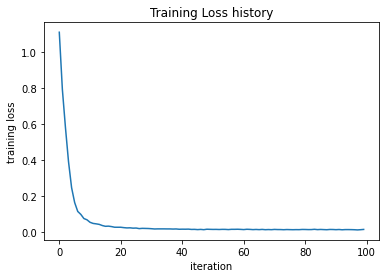

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [8]:
from data.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = './data/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 15-18%.

In [9]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-5, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net
test_acc = (subopt_net.predict(X_test) == y_test).mean()
print('Test accuracy (subopt_net): ', test_acc)

iteration 0 / 1000: loss 2.302642126664509
iteration 100 / 1000: loss 2.3025989121411037
iteration 200 / 1000: loss 2.302592429071954
iteration 300 / 1000: loss 2.302565850212495
iteration 400 / 1000: loss 2.3025579136346885
iteration 500 / 1000: loss 2.3024960598650543
iteration 600 / 1000: loss 2.3024177519858746
iteration 700 / 1000: loss 2.302348862497426
iteration 800 / 1000: loss 2.3023512681521794
iteration 900 / 1000: loss 2.3022970074152407
Validation accuracy:  0.234
Test accuracy (subopt_net):  0.238


In [10]:
stats['train_acc_history']

[0.09, 0.145, 0.23, 0.225, 0.245]

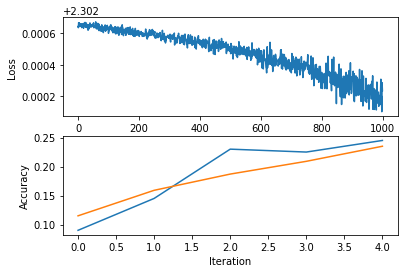

In [11]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.show()

**Questions:**

The training accuracy isn't great. It seems even worse than simple KNN model, which is not as good as expected.

(1) What are some of the reasons why this is the case? Based on previous observations, please provide at least two possible reasons with justification.

(2) How should you fix the problems you identified in (1)?

**Answers:**

<span style="color:blue"> Please write down your answer here! </span>

1. The number of iterations might be too small, and the learning rate might also be too small, such that the the training hasn't converged and reached its optimization till the end.

2. We can increase the number of iterations and do more training. Also, we can increase the learning rate or decrease the learning rate decay.

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net. To get the full credit of the neural nets, you should get at least **45%** accuracy on validation set. 

**Reminder: Think about whether you should retrain a new model from scratch every time your try a new set of hyperparameters. **

In [ ]:
best_net = None # store the best model into this 

# ================================================================ #
# START YOUR CODE HERE:
# ================================================================ #
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 45% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 23%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #

# todo: optimal parameter search (you may use grid search by for-loops )
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
best_valacc = 0
best_net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = best_net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=100,
            learning_rate=3e-3, learning_rate_decay=0.7,
            reg=0.05, verbose=True)

# Predict on the validation set
best_valacc = (best_net.predict(X_val) == y_val).mean()

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.show()


# Save this net as the variable subopt_net for later comparison.
# subopt_net = net

# print(best_net.params)


# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
# Output your results
print("== Best parameter settings ==")
# print your best parameter setting here!
print("Best accuracy on validation set: {}".format(best_valacc))

iteration 0 / 5000: loss 2.302613099299309
iteration 100 / 5000: loss 1.8491024705252783
iteration 200 / 5000: loss 1.6352105255164477
iteration 300 / 5000: loss 1.7522341464153315
iteration 400 / 5000: loss 1.737992220086408
iteration 500 / 5000: loss 1.5579737660528779
iteration 600 / 5000: loss 1.7307495527041616
iteration 700 / 5000: loss 1.56974815380458
iteration 800 / 5000: loss 1.458100769175564
iteration 900 / 5000: loss 1.6929654207259226
iteration 1000 / 5000: loss 1.6318395005046897
iteration 1100 / 5000: loss 1.5697640394951429
iteration 1200 / 5000: loss 1.291384570411332
iteration 1300 / 5000: loss 1.592513875783619
iteration 1400 / 5000: loss 1.3317720764873384
iteration 1500 / 5000: loss 1.5473938624817118
iteration 1600 / 5000: loss 1.3358468148853155
iteration 1700 / 5000: loss 1.3768537857181662
iteration 1800 / 5000: loss 1.3728783574851438
iteration 1900 / 5000: loss 1.597080856082713
iteration 2000 / 5000: loss 1.1431784568960452
iteration 2100 / 5000: loss 1.408

**Quesions**

(1) What is your best parameter settings? (Output from the previous cell)

(2) What parameters did you tune? How are they changing the performance of nerural network? You can discuss any observations from the optimization.

**Answers**

<span style="color:blue"> Please write down your answer here! </span>
1. The best parameter setting is "num_iters=3000, batch_size=100, learning_rate=3e-3, learning_rate_decay=0.6,reg=0.05, verbose=True". It achieves the accuracy of 0.53.

2. The increase of iterations makes the model to be trained for more times and converges more colsers to its optimization;

    The decrease of learning rate decay makes the learning rate decreases faster than before, which prevents the model from going furthur away from its optimization;

    The decreases of batch size makes the model be trained faster and makes the memory be utilized less.


---

## Visualize the weights of your neural networks

In [ ]:
from data.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

**Questions:**

What differences do you see in the weights between the suboptimal net and the best net you arrived at? What do the weights in neural networks probably learn after training?

**Answer:**

<span style="color:blue"> Please write down your answer here! </span>

The sub-optimal net doesn't have obvious different colors and shapes among each two classifications. However, the best net has obvious shape and colors which means the weights of the params are clearly diffferentiated, which can do the classification in a more meaningful and clear way.

---

## Evaluate on test set 

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy (best_net): ', test_acc)

**Questions:**

(1) What is your test accuracy by using the best NN you have got? How much does the performance increase compared with kNN? Why can neural networks perform better than kNN?

(2) Do you have any other ideas or suggestions to further improve the performance of neural networks other than the parameters you have tried in the homework? 

**Answers:**

<span style="color:blue"> Please write down your answer here! </span>

1. The test accuracy for the best NN is 0.473. This accuracy is higher than the accuracy achieved by the KNN, which was 0.282. The neural networks can perform better because the existance of hidden layer and activation functions adds non-linearity to the model, which can classify features in higher dimensions and in a more complex way. In contrast, KNN only evaluates classification based on neighbors of each pixel, which cannot be very accurate.

2. We can add more hidden layers and manipulates the number of neurons so that we can detect higher level/dimension features, and adds complexity to the model.


---

## Bonus Question: Change MSE Loss to Cross Entropy Loss

This is a bonus question. If you finish this (cross entropy loss) correctly, you will get **up to 10 points** (add up to your HW3 score). 

Note: From grading policy of this course, your maximum points from homework are still 25 out of 100, but you can use the bonus question to make up other deduction of other assignments.

Pass output scores in networks from forward pass into softmax function. The softmax function is defined as,
$$p_j = \sigma(z_j) = \frac{e^{z_j}}{\sum_{c=1}^{C} e^{z_c}}$$
After softmax, the scores can be considered as probability of $j$-th class.

The cross entropy loss is defined as,
$$L = L_{\text{CE}}+L_{reg} = \frac{1}{N}\sum_{i=1}^{N} \log \left(p_{i,j}\right)+ \frac{\lambda}{2} \left(||W_1||^2 + ||W_2||^2 \right)$$

To take derivative of this loss, you will get the gradient as,
$$\frac{\partial L_{\text{CE}}}{\partial o_i} = p_i - y_i $$

More details about multi-class cross entropy loss, please check [http://cs231n.github.io/linear-classify/](http://cs231n.github.io/linear-classify/) and [more explanation](https://deepnotes.io/softmax-crossentropy) about the derivative of cross entropy.

Change the loss from MSE to cross entropy, you only need to change you ```MSE_loss(x,y)``` in ```TwoLayerNet.loss()``` function to ```softmax_loss(x,y)```.

**Now you are free to use any code to show your results of the two-layer networks with newly-implemented cross entropy loss. You can use code from previous cells.**

In [ ]:
# Start training your networks and show your results
# ================================================================ #
# START YOUR CODE HERE:
# ================================================================ #
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
best_valacc2 = 0
best_net2 = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats2 = best_net2.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=100,
            learning_rate=3e-3, learning_rate_decay=0.6,
            reg=0.05, verbose=True)

# Predict on the validation set
best_valacc2 = (best_net2.predict(X_val) == y_val).mean()

plt.subplot(2, 1, 1)
plt.plot(stats2['loss_history'])
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats2['train_acc_history'], label='train')
plt.plot(stats2['val_acc_history'], label='val')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.show()
print("Best accuracy on validation set: {}".format(best_valacc2))
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

----

## End of Homework 3, Part 2 :)

After you've finished both parts the homework, please print out the both of the entire `ipynb` notebooks and `py` files into one PDF file. Make sure you include the output of code cells and answers for questions. Prepare submit it to GradeScope. Do not include any dataset in your submission.  